<h1 style="font-size:40px"><center>Classification of audio data using deep learning approaches</center></h1>

<div style="width:100%;height:3px; background-color:black"></div>

<p style="font-size:30px;"><u>Data Description</u></p>

<p style="font-size: 20px">The dataset has been provided by UK Home office is an audio dataset with 8732 labelled sound recordings that are all no longer than 4 seconds each. The audio files contain urban sounds from 10 various classes includes: </p>
<ul style="font-size: 20px">
    <li>street music</li> 
    <li>air conditioner</li>
    <li>car horn</li> 
    <li>children playing</li>
    <li>dogs barking</li>
    <li>drilling</li>
    <li>idle engines</li>
    <li>gunshots</li> 
    <li>jack hammers</li>
    <li>siren</li>
</ul>
<p style="font-size: 20px">The dataset has been pre-sorted into ten folders, and there is also a CSV file with metadata about each excerpt. The metadata contains details about the audio file, such as its name, the recording's sound ID, the start and finish times of each slice, and the class ID of the sound.</p>

<div style="width:100%;height:3px; background-color:black"></div>

<p style="font-size:30px;"><u>Deep Learning Neural Networks</u></p>

<p id="top" style="font-size: 20px">Four different neural networks have been implemented in this project. The purpose of using four neural network is determine which yields the best results for the classification of audio data.</p>
<ul style="font-size: 20px">
    <li><a href="#ann">ANN (Artificial Neural Network)</a></li> 
    <li><a href="#lstm">LSTM (Long Short-Term Memory) -- type of RNN (Recurrent Neural Network)</a></li>
    <li><a href="#1dcnn">1D-CNN (1D-Convolutional Neural Network)</a></li> 
    <li><a href="#cnn">CNN (2D-Convolutional Neural Network)</a></li>
</ul>

<p style="font-size: 20px">I have used above four listed neural networks for the audio classification. Each algorithm has its own strengths and weaknesses,and the choice of the algorithm depends upon the specific problem. As from the data description written above it is clear that we have multi-class classification problem (each audio clip belongs to a particular category or class), all these algorithms can handle classification problem very well.</p>

<p style="font-size: 20px">All of the above neural networks have the ability to handle complex input data such as audio signals in our case.</p>

<p style="font-size: 20px">ANN can be used to handle large audio datasets. LSTM can be used to model the temporal relationships between different parts of an audio signal, allowing them to capture important features of the sound. 1DCNN can be used for speech recognition, it has the ability to learn features of the audio signal at different scales. CNN is a type of neural network can also be used for audio classfication, it has the ability to fine-grained the details of the sound.</p>

<p style="font-size: 20px">To find the best hyperparameters for each algorithm or neural network, "RandomizedSearchCV" has been used.</p>

<p id="top1" style="font-size: 20px"> <b>Navigation </b></p>
<ul style="font-size: 20px">
    <li><a href="#lib">Libraries</a></li> 
    <li><a href="#eda">Exploratory Data Analysis</a></li> 
    <li><a href="#pre">Data Pre-processing</a></li>
    <li><a href="#res">Neural Networks Comparison</a></li> 
</ul>

<div style="width:100%;height:3px; background-color:black"></div>

<p id="lib" style="font-size:30px; text-align:center"><u>Required libraries or packages</u></p> <a href="#top1">Back To Top</a>

<div style="width:100%;height:3px; background-color:black"></div>

In [1]:
################# Exploratory Data Analysis #################

import os # To interact with the operating system. Here I am using this library to access the audio files from the directory
import pandas as pd # For data manipulation and analysis
import numpy as np # To perform high level mathematical operations
from tqdm import tqdm # To track the progress of iterative tasks
import matplotlib.pyplot as plt # For animated and interactive visualisations
%matplotlib inline
import seaborn as sns # For visualisations of data
from tabulate import tabulate # To create table to insert the results of each neural network
import warnings # To ignore unsual warnings from some functions
# warnings.filterwarnings('ignore') #ignore warning from the any function so we do not need to scroll more


################# Pre-processing #################

#### Audio Processing Libraries ####
import librosa # For analysig and processing audio signals
import IPython.display as ipd # To display rich media like image, videos or audio. I am using this to play audio file

#### Prepare data before training the model ####
from sklearn.preprocessing import StandardScaler # To standardise the dataset 
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split # Split arrays or matrices into random train and test subsets.


################# Hyperparameters Tuning #################

from sklearn.model_selection import RandomizedSearchCV  # for hyperparameter tuning
from keras.wrappers.scikit_learn import KerasClassifier # wrapper that allows to use keras models with RandomizedSearchCV and GridSearchCV

################# Machine Learning Libraries #################

import tensorflow as tf # for building machine learning models
from tensorflow.keras.models import Sequential # for creating sequential model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D, Conv2D, MaxPooling2D, LSTM, BatchNormalization # for building the layers of the deep learning model
# Dense : connected layer to connect every input to every output node
# Dropout : Regularization technique to prevent overfitting
# Activation : for the non-linear activation functions like ReLU, sigmoid and tanh
# Flatten : for transition between the layers 
# Conv1D :  1D convolutional layer to process sequences of data
# MaxPooling1D : To reduce the spatial dimensionality of the feature maps or input data
# Conv2D :  2D convolutional layer to process sequences of data
# MaxPooling2D : To reduce the spatial dimensionality of the feature maps or input data
# LSTM : To model the temporal dependencies in sequential data
# BatchNormalization : To improve the training stability of deep neural networks by normalizing the inputs to each layer
from tensorflow.keras.optimizers import Adam # for model optimization
from keras.models import load_model # Load the saved model from the saved model directory
from tensorflow.keras.callbacks import ModelCheckpoint # to save the model and use it for later use


################# Evaluation Libraries #################

from sklearn import metrics  # for evaluating the performance of the model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, f1_score # for calculating evaluation metrics
# From te confusion matrix I will be calculating sensitivity or recall, specificity, mis-classification and loss

2023-04-18 13:58:38.451017: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 13:58:39.315530: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/lib64
2023-04-18 13:58:39.315582: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/lib64
2023-04-18 13:58:39.315587: W tensorflow/compiler/tf2tensorrt/utils/py_utils

<div style="width:100%;height:3px; background-color:black"></div>

<p style="font-size:30px;"><u>Load the metadata and assign audio files main directory path</u></p>

In [2]:
audio_meta_data = pd.read_csv("data.csv") # Loads the metadata
audio_directory_path = 'audio/' # Assign the main directory path of audio files to the variable

<div style="width:100%;height:3px; background-color:black"></div>

<p id="eda" style="font-size:30px; text-align:center"><u>Exploratory Data Analysis</u></p> <a href="#top1">Back To Top</a>

<div style="width:100%;height:3px; background-color:black"></div>

In [3]:
audio_meta_data.info() # dataframe's info() method to get the precise summary of the audio metadata

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


<p style="font-size: 20px; margin-top: 10px">From above it can be seen that, there is a list of columns of the metadata, with their number of occurrences and data types. All the variables are numeric other than the "slice_file_name" and "class" which are objects. There are 8732 number of occurences are rows in the dataset which are basically the number of audio files which we have in "/audio" directory.</p>

<div style="width:100%;height:1px; background-color:black"></div>

In [4]:
audio_meta_data.head() # To check rows of the dataset from the start

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


<p style="font-size: 20px; margin-top: 10px">Dataframe head method is used to check the first five rows of the audio metadata. We can also pass values inside head function if we want to see more number of records or rows. It can be seen that each row represents one complete observation of each file, each has audio file, start and end time, audio id, in which fold it saved and to which class it belongs.</p>

<div style="width:100%;height:1px; background-color:black"></div>

In [5]:
audio_meta_data.tail() # To check rows of the dataset from the end

,slice_file_name,fsID,start,end,salience,fold,classID,class
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn
8731,99812-1-6-0.wav,99812,332.289233,334.821332,2,7,1,car_horn


<p style="font-size: 20px; margin-top: 10px">Dataframe tail method is used to check the last five rows of the audio metadata. </p>

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px; font-weight: bold">Check Missing Values </p>

In [6]:
audio_meta_data.isna().sum() # isna() method to check NaN values in the dataset, sum() to sum-up all NaN values for each column

slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64

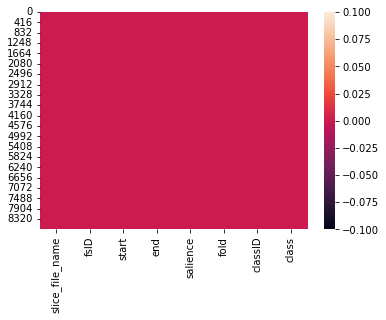

In [7]:
# heatmap() method of seaborn has been used to visualise missing values
sns.heatmap(audio_meta_data.isna()); # isna() method to check NaN values in the dataset
plt.show()

<p style="font-size: 20px; margin-top: 10px">From above it can be seen that there is no missing value in the audio metadata. </p>

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px; font-weight: bold">Class Distribution</p>

In [8]:
audio_meta_data["class"].value_counts() # Count the values of each class in column 'class'

dog_bark            1000
street_music        1000
children_playing    1000
jackhammer          1000
engine_idling       1000
air_conditioner     1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

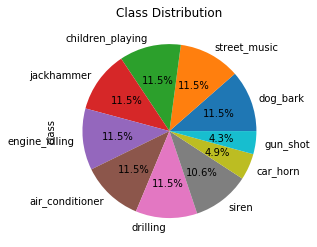

In [9]:
audio_meta_data['class'].value_counts().plot(kind='pie',autopct='%1.1f%%'); # Visualisation of class proportion using pie chart
plt.title('Class Distribution')
plt.show()

<p style="font-size: 20px; margin-top: 10px">Above list and pie chart shows that we have ten classes of urban sound dataset. This multi-class dataset is imbalance as each siren, car_horn and gun_shot have different number of records.</p>

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px; font-weight: bold">Analyse audio signals</p>

<p style="font-size: 20px; margin-top: 10px"> To analyse the audio signals I will be importing one audio file from the audio file's directory. I will display the waveform and mel-spectogram of the audio file. By using the audio file I will display the audio waveform and mel-spectrogram. The purpose of analyzing the audio signals and displaying the waveform and mel-spectrogram of the audio file is to gain insights and characteristics of the sound signal. It can be helpful to extract features from the audio that can be used for audio classification.</p>

In [10]:
file_name = "7061-6-0-0.wav" # filname string
fold = "fold1" # fold name string

In [11]:
class_name = audio_meta_data.loc[audio_meta_data['slice_file_name'] == file_name, 'class'].iloc[0] # To find the class name of the corresponding audio file from audio metadata
class_id = audio_meta_data.loc[audio_meta_data['slice_file_name'] == file_name, 'classID'].iloc[0]

In [12]:
class_name

'gun_shot'

In [13]:
class_id

6

In [14]:
audio_file = audio_directory_path + fold +"/" + file_name # get audio file from the directory
signal, sr = librosa.load(audio_file, sr=22050) # function to load the audio file and get audio signal array and sampling rate
signal

array([-1.3038516e-08,  5.9604645e-08,  4.0978193e-08, ...,
        1.0127551e-05,  2.3271272e-05,  7.0010101e-06], dtype=float32)

In [15]:
signal.shape

(49613,)

In [16]:
sr

22050

In [17]:
ipd.Audio(audio_file) # It is a function from IPython.display package for an audio player, that can play audio file

<p style="font-size: 23px; margin-top: 10px;"><u>Waveform</u></p>

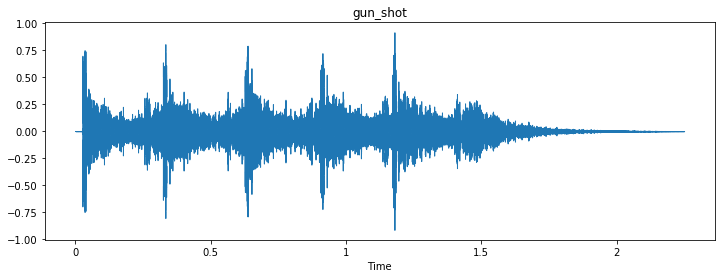

In [18]:
plt.figure(figsize=(12, 4)) # Set the figure size for the waveform of an audio signal
plt.title(class_name) # This line sets the title of waveform
librosa.display.waveshow(signal, sr=sr) # To plot the waveform of an audio signal
plt.show() # To display the waveform in the current figure

<p style="font-size: 20px; margin-top: 10px"> The above waveform shows the visual representation of signal's amplitude over a period of time. This waveform can be use to see the patterns in the signal which can be useful for the audio classfication. It can be helpful to identifying the issues tha can lower the accuracy of the audio classfication model.</p>

<p style="font-size: 23px; margin-top: 10px;"><i>Let's visualize some samples of the same class to observe if there is a notable difference</i></p>

In [19]:
def load_wave(folder, file_name): # function defined to load the audio signal from the directory using librosa package
    y, sr = librosa.load(audio_directory_path + 'fold' + folder + '/' + file_name, sr=None, mono=False) #librosa package to load the audio file
    return y, sr # function returning audio signal and sampling rate

In [20]:
def get_audio_file_by_classId(data,classId) : # function definition to get the file locations of the audio samples
    file_locations = [[row['fold'], row['slice_file_name']] for index, row in data[data['classID'] == classId].reset_index().iterrows()]
    return file_locations

In [21]:
def get_sample_by_classId(audio_meta_data, sample, classId): #function defined to get the sample files with respect to the class id
    groups = audio_meta_data.groupby("classID").sample(sample)
    return get_audio_file_by_classId(groups,classId)  # function declaration to get the file locations of the audio samples

In [22]:
def plot_waveform(classId,class_name, sample): # function defined to plot the different samples of same class
    files = get_sample_by_classId(audio_meta_data,sample,classId) # function declared to get the sample files with respect to the class id. 
    fig, ax = plt.subplots(nrows=sample,sharex='all', figsize=(20,10)) # To create a figure subplots, where each subplot displays the waveform of a sample file
    for idx, file in enumerate(files) :
        y, sr = load_wave(f'{file[0]}',f'{file[1]}') # funcion declaration to load the waveform
        ax[idx].set_ylim(ymin=0)
        librosa.display.waveshow(y, sr=22050,ax=ax[idx]) # To display waveform by using display.waveshow() function of librosa package
        ax[idx].set_title(f'File: {file[1]}')
        
    fig.text(0.06, 0.5, 'Waveform', ha='center', va='center', rotation='vertical') # To dislay the label on the y-axis
    plt.suptitle(f"Class : {class_name}", fontsize=14) # To give the title of the plots
    
    fig.subplots_adjust(hspace=0.4) # It will adjust the spacing between the plots
    plt.show()

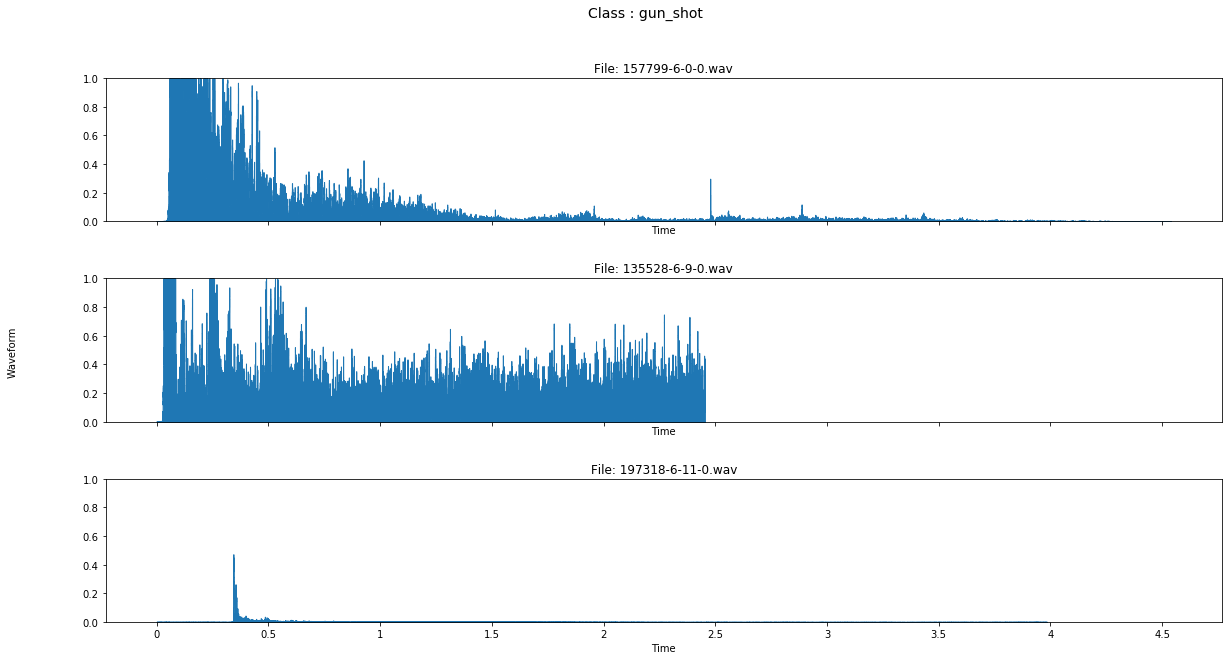

In [23]:
plot_waveform(class_id, class_name, 3) # Function declaration to display 3 samples of the class name gun_shot

<p style="font-size: 20px; margin-top: 10px"> By plotting multiple samples of the gun_shot class in waveform, we can get an idea of the variability in the signals within the class. This can be helpful in understanding the different sources of variation and identifying common features that can be used for classification. </p>

<div class="alert alert-warning"><p style="font-size: 20px; margin-top: 10px"> Although the waveform of the audio signals can give us the very important information however due to the high dimensionality it is difficult to extract the meaningful features from the waveform directly. Moreover, we cannot extract frequency content and spectral shape easily. Furthermore, audio signals are noisy and have high degree of variability. This can make it difficult to identify common features across different signals.</p></div>

<p style="font-size: 23px; margin-top: 10px;"><u>Mel-Spectrogram</u></p>

<div class="alert alert-success"><p style="font-size: 20px; margin-top: 10px"> Mel-Spectrogram is a popular method because it addresses the above limitation mentioned in the alert box. It converts the audio signal from the time domain to the frequency domain. Mel-Spectrogram captures both temporal and spectral information, which allows the extraction of meaningful features in detail. Furthermore, we can also reduce the noise and variability in the signal by using logarithmic scaling.</p></div>

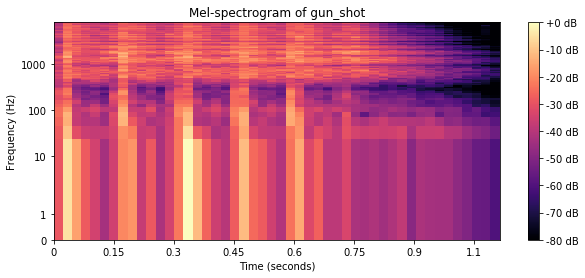

In [24]:
mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=2048, hop_length=1024, n_mels=128) # to compute the mel-spctrogram of the audio sigal by using melspctrogram method of librosa library
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max) # for he better representation of the range of values in the signal 
plt.figure(figsize=(10, 4)) # set the figure size to be displayed
librosa.display.specshow(mel_spec_db, x_axis='time', y_axis='mel', sr=sr, fmax=8000) # for the plotting of mel-spectrogram
plt.colorbar(format='%+2.0f dB') # add colorbar to the plot with dB units
plt.title('Mel-spectrogram of ' + class_name) # title of the plot
plt.xlabel('Time (seconds)') # Label at x-axis
plt.ylabel('Frequency (Hz)') # Label at y-axis
plt.show()

<p style="font-size: 20px; margin-top: 10px"> I will be using MFCC (Mel-frequency cepstral coefficients) from the audio samples. MFCCs are basically derived from the Mel-spectrogram of an audio signal, and they capture the spectral envelope of the signal by modeling the short-term power spectrum of the signal using a set of cepstral coefficients. By using MFCCs it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify for classification.</p>

<div style="width:100%;height:3px; background-color:black"></div>

 <p id="pre" style="font-size:30px; text-align:center"><u>Data Pre-processing</u></p><a href="#top1">Back To Top</a>

<div style="width:100%;height:3px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px; font-weight: bold">Resampling</p>

<p style="font-size: 20px; margin-top: 10px">Resampling is the process to convert the sampling rate of the audio signal to the different signal rate. The purpose of resampling to reduce noise form the high frequency data and increase processing time. In this project, I am using librosa.load() function with the "sr" parameter specified to the desired sampling rate. This "sr" parameter specifies the desired sampling rate of the audio signal, I will load all the files by passing this parameter <mark>sr=22050</mark>. If the audio file's original sampling rate matches the specified value, then librosa will not perform any resampling.</p>

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px; font-weight: bold">Feature Engineering (Extraction, Scaling, Normalization and Dimensionality Reduction)</p>

<p style="font-size: 20px; margin-top: 10px"> I am using MFCC (Mel-frequency cepstral coefficients) from the audio samples. MFCCs are basically derived from the Mel-spectrogram of an audio signal, and they capture the spectral envelope of the signal by modeling the short-term power spectrum of the signal using a set of cepstral coefficients. By using MFCCs it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify for classification.</p>

<p style="font-size: 23px; margin-top: 10px;"><u>Feature Scaling Function</u></p>

<p style="font-size: 20px; margin-top: 10px">The purpose of feature scaling is to ensure that all the features are in same range, so it will be easir for machine learning model to process them.</p>

In [25]:
def feature_scaling(mfcc):    
    scaler = StandardScaler() # To scale the MFCC features by using StandardScaler method of scikit-learn pre-processing
    mfcc_scaled = scaler.fit_transform(mfcc)
    
    return mfcc_scaled

<p style="font-size: 23px; margin-top: 10px;"><u>Feature Normalization Function</u></p>

<p style="font-size: 20px; margin-top: 10px">The purpose of feature normalization is to standardised the distribution of the data, making it easier to compare and classify them. This ensure that the features are consistent across different audio signals.</p>


In [26]:
def feature_normalization(mfcc_scaled):
    # Assuming mfcc_features is a matrix of size (num_samples, num_frames, num_mfcc_coeffs)
    # Compute the mean and standard deviation of each coefficient over the training set
    mean = np.mean(mfcc_scaled, axis=(0,1))
    std = np.std(mfcc_scaled, axis=(0,1))

    # Normalize the features using Z-score normalization
    mfcc_normalized = (mfcc_scaled - mean) / std
    return mfcc_normalized

<p style="font-size: 23px; margin-top: 10px;"><u>Feature Dimensionality Reduction Function</u></p>

<p style="font-size: 20px; margin-top: 10px">The purpose of dimensionality reduction is to reduce the number of features in the audio signals which are not important for the classification. This technique also helps in reducing the complexity of the model, prevent overfitting, and improve generalization of the model.</p>


In [27]:
def feature_dimensionality_reduction(mfcc_normalized):
        pca = PCA()
        pca.fit(mfcc_normalized)

        # Choose optimal number of components
        n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1

        # Transform the data using the optimal number of components
        mfcc_pca = pca.transform(mfcc_normalized)[:, :n_components]
        
        return mfcc_pca

<p style="font-size: 23px; margin-top: 10px;"><u>Feature extraction from all audio files</u></p>

In [28]:
warnings.filterwarnings('ignore') # To ignore the warning from the output of feature.mfcc function

In [29]:
def feature_extraction_of_all_audio_files():
    
    classes = list(np.unique(audio_meta_data["class"]))
    mfccs = [] # save the mfccs features in this list
    labels = [] # save the target labels in this this lis corresponding to the feature
    for i, row in tqdm(audio_meta_data.iterrows()): # for loop to extract the MFCCs faetures of all the audio files
        
        file_path = os.path.join(os.path.abspath(audio_directory_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"])) # file path
        class_label = row["class"] # class label of each audio file
        y, sr = librosa.load(file_path, sr=22050) # load the file in the librosa package
        
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40) # To extract MFCCs features
        label_idx = classes.index(class_label) # To find the index of the class label in the list
        label = np.zeros(len(classes)) # this creates zero filled array of length equal to the number of classes wen have
        label[label_idx] = 1 # set the value of class label to 1
        
        
            
        ########################## Scaling ##########################
        mfcc_scaled = feature_scaling(mfcc)
        
        ########################## Normalization #########################
        
        mfcc_normalized = feature_normalization(mfcc_scaled)
        
        ##################### Dimensionality Reduction ######################
        
        mfcc_pca = feature_dimensionality_reduction(mfcc_normalized)
        
        #################### Pad or truncate the MFCC sequence to a fixed length #####################
        max_length = 500
        if mfcc_pca.shape[1] < max_length:
            # Pad sequence with zeros
            pad_width = max_length - mfcc_pca.shape[1]
            mfcc_pca = np.pad(mfcc_pca, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc_pca = mfcc_pca[:, :max_length] # Truncate sequence
        
        mfccs.append(mfcc_pca) # append mfcc feature to the list
        labels.append(label) # append label to the list
        
    return mfccs, labels
    

In [30]:
mfccs, labels = feature_extraction_of_all_audio_files()

8732it [02:53, 50.41it/s]


<p style="font-size: 20px; margin-top: 10px">In the above line of code, I am declaring the function  of <mark>feature_extraction_of_all_audio_files()</mark> to extract the features from all the audio files. Inside the definition of this function I am also calling scaling, normalization and dimensionality reduction functions to perform these techniques to all the audio files one by one after feature extraction of each.</p>

In [31]:
# I am converting MFCC features and labels to numpy arrays so we can easily perform operations such as reshaping, splitting and normalization 
mfccs = np.array(mfccs) # convert mfccs features to numpy array

In [32]:
labels = np.array(labels) # convert labels to numpy array

In [33]:
mfccs.shape

(8732, 40, 500)

In [34]:
labels.shape

(8732, 10)

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px; font-weight: bold">Test/Train/Validation Split</p>

<p style="font-size: 20px; margin-top: 10px">In this section, I am splitting the mfccs features and labels into train and test splits. Mfccs features extracted from the audio signals and labels contains the corresponding class for each audio file.</p>

<p style="font-size: 20px; margin-top: 10px">I am splitting the data into 70/15/15 rule, 70% for training, 15% for validation and 15% for the testing. This rule has been applied to make sure that the model is trained on a suitable volume of data and that there is a sufficient amount of data available to evaluate the model's performance both during training and after it has been completed. The hyperparameter random_state = 42 has been used which ensures that the split is reproducible</p>

In [35]:
X_train_val, X_test, y_train_val, y_test = train_test_split(mfccs, labels, test_size=0.15, random_state=42) # Splitting the data into X_train_val, X_test, y_train_val, y_test separate arrays

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42) # Splitting the data into X_train, X_val, y_train, y_val separate arrays

In [37]:
X_train.shape # To check the shape of X_train

(6308, 40, 500)

In [38]:
y_train.shape # To check the shape of y_train

(6308, 10)

In [39]:
X_val.shape # To check the shape of X_val

(1114, 40, 500)

In [40]:
y_val.shape # To check the shape of y_val

(1114, 10)

In [41]:
X_test.shape # To check the shape of X_test

(1310, 40, 500)

In [42]:
y_test.shape # To check the shape of y_test

(1310, 10)

<div style="width:100%;height:3px; background-color:black"></div>

<p style="font-size:30px; text-align:center"><u>Model Training</u></p>

<div style="width:100%;height:3px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px; font-weight: bold">Common variables or lists</p>

In [43]:
table_columns = ["Model", "Accuracy", "Precision", "Recall", "F1 score", "Sensitivity", "Specificity"] # List to set the columns for the table in which results of all the models will be shown

In [44]:
result = [] # An array of the results of the all models

In [45]:
mis_classification_loss_table = ["Model", "Mis-Classification", "Loss"] # List to set the columns for the table in which mis-classification and loss of all the models will be shown

In [46]:
mis_classification_loss_result = []

In [47]:
labels_ = audio_meta_data[['classID', 'class']].value_counts().keys().sort_values()
label_dict = dict(labels_)
label_dict

{0: 'air_conditioner',
 1: 'car_horn',
 2: 'children_playing',
 3: 'dog_bark',
 4: 'drilling',
 5: 'engine_idling',
 6: 'gun_shot',
 7: 'jackhammer',
 8: 'siren',
 9: 'street_music'}

In [48]:
num_labels=labels.shape[1] # Total number of classes
num_labels

10

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px; font-weight: bold"><u>Common functions</u></p>

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Feature extraction from single audio file</p>

In [49]:
def extract_feature_from_single_file():
    # Load audio file
    audio_file_path = audio_directory_path + "fold7/99812-1-6-0.wav"
    y, sr = librosa.load(audio_file_path, sr=22050)

    # Extract MFCC features
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

    ########################## Scaling ##########################
    mfcc_scaled = feature_scaling(mfcc)
    
    
    ########################## Normalization #########################
        
    mfcc_normalized = feature_normalization(mfcc_scaled)

    ##################### Dimensionality Reduction ######################
        
    mfcc_pca = feature_dimensionality_reduction(mfcc_normalized)

    # Pad or truncate the MFCC sequence to a fixed length
    max_length = 500
    if mfcc_pca.shape[1] < max_length:
        # Pad sequence with zeros
        pad_width = max_length - mfcc_pca.shape[1]
        mfcc_pca = np.pad(mfcc_pca, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        # Truncate sequence
        mfcc_pca = mfcc_pca[:, :max_length]
    
    # mfccs.append(mfcc)
    # Reshape MFCC features to have a "channel" dimension of 1 (required for some neural network architectures)
    mfcc = mfcc_pca.reshape(mfcc_pca.shape[0], mfcc_pca.shape[1], 1)

    # Print shape of MFCC features
    print(mfcc.shape)
    mfcc = np.array([mfcc])
    
    return mfcc

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Confusion Matrix</p>

In [50]:
def confusion_matrix_custom(test_labels_class, predicted_class, label_dict):
    # calculate confusion matrix
    confusion = confusion_matrix(test_labels_class, predicted_class)

    # create labels for the matrix
    # labels = ['Class 0', 'Class 1', 'Class 2']

    # create figure and axes
    fig, ax = plt.subplots()

    # create image using imshow
    im = ax.imshow(confusion, cmap='Blues')

    # set tick marks and labels
    ax.set_xticks(np.arange(len(label_dict)))
    ax.set_yticks(np.arange(len(label_dict)))
    ax.set_xticklabels(label_dict)
    ax.set_yticklabels(label_dict)

    # add annotations to the image
    for i in range(len(label_dict)):
        for j in range(len(label_dict)):
            ax.text(j, i, confusion[i, j], ha="center", va="center", color="white")

    # add labels and title
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')

    # show the plot
    plt.show()
    
    return confusion

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">TP, FP, FN, TN</p>

In [51]:
def TF_FP_FN_TN(confusion): #function definition to get TF,FP,FN,TN for each model
    
    true_positives = np.diag(confusion)
    false_positives = np.sum(confusion, axis=0) - true_positives
    false_negatives = np.sum(confusion, axis=1) - true_positives
    true_negatives = np.sum(confusion) - (true_positives + false_positives + false_negatives)
    
    return true_positives, false_positives, false_negatives, true_negatives

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Sensitivity or Recall</p>

In [52]:
def sensitivity_custom(true_positives, false_negatives):  #function definition to calculate sensitivity or recall of each model
    sensitivity = true_positives / (true_positives + false_negatives)

    sum_of_all_classes = 0
    for i in sensitivity:
        sum_of_all_classes = sum_of_all_classes +i
    average_sensitivity = sum_of_all_classes/ len(sensitivity) #Specificity of the model
    print('average_sensitivity or recall:', average_sensitivity)
    
    return average_sensitivity

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Specificity</p>

In [53]:
def specificity_custom(true_negatives, false_positives): #function definition to calculate specificity of each model
    specificity = true_negatives / (true_negatives + false_positives)

    sum_of_all_classes = 0
    for i in specificity:
        sum_of_all_classes = sum_of_all_classes +i
    average_specificity = sum_of_all_classes/ len(specificity) #Specificity of the model
    print('average_specificity:', average_specificity)
    return average_specificity

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Mis-Classification</p>

In [54]:
def mis_classification_custom(false_negatives, true_positives, true_negatives, false_positives ): #function definition to calculate overall mis-classfication of each model
    
    mis_classification = (false_positives + false_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
    sum_of_all = 0
    for i in mis_classification:
        sum_of_all = sum_of_all +i
    average_mis_classification = sum_of_all/ len(mis_classification) #Misclassification
    print("Mis-Classification: ",average_mis_classification)
    return average_mis_classification

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Loss</p>

In [55]:
def loss_custom(test_labels_class, predicted_class): # function definition to calculate overall loss of each model
    
    error_rate = []
    for i in test_labels_class: # This loop is checking where predicted result and target result is not matching and saving to error rate array
        error_rate.append(np.mean(predicted_class != test_labels_class))


    sum_of_all_loss = 0
    for i in error_rate: #Sum of the error rates
        sum_of_all_loss = sum_of_all_loss +i
    overall_loss = sum_of_all_loss/ len(error_rate) #Overall loss of the model
    print("overall_loss: ",overall_loss)
    
    return overall_loss

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">AUC</p>

In [57]:
def area_under_the_curve(X_test, y_test): #function definition to plot auc of each model

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the AUC for each class
    auc_scores = []
    for i in range(num_labels):
        auc = roc_auc_score(y_test[:, i], y_pred[:, i])
        auc_scores.append(auc)

    # Calculate the macro-average AUC
    auc_macro = np.mean(auc_scores)

    # Plot the ROC curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(num_labels):
        fpr, tpr, _ = roc_curve(y_test[:, i], y_pred[:, i])
        plt.plot(fpr, tpr, label='Class %d (AUC = %.2f)' % (i, auc_scores[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='lower right')
    plt.show()

    print('Macro-average AUC:', auc_macro)
    
    return 

<div style="width:100%;height:3px; background-color:black"></div>

<p id="ann" style="font-size: 23px; margin-top: 10px; font-weight: bold">ANN (Artificial Neural Network)</p> <a href="#top">Back To Top</a>

<div style="width:100%;height:3px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px;"><u>Hyperparameter Tuning</u></p>

<p style="font-size: 20px; margin-top: 10px">The hyperparameters need tuning otherwise it can impact the performance of the model if the best values are not identified. For the hyperparameter tunning there are many techniques like GridSearchCV and RandomSearchCV. GridSearchCV search the hyperparameters by applying all the possible combinations of hyperparameters values whereas RandomSearchCV randomly sample the hyperparameter values for a specified number of iterations. Consequently, I am using RandomSearchCV for the hyperparameters tuning because GridSearchCV can be computationally expensive.</p>

In [84]:
warnings.filterwarnings('ignore') # To ignore the warning

In [85]:
def ANN_model(optimizer='adam', activation='relu', hidden_layer1=128, hidden_layer2=64):
    model = Sequential()
    model.add(Flatten(input_shape=(mfccs.shape[1], mfccs.shape[2])))
    model.add(Dense(hidden_layer1, activation=activation))
    model.add(Dense(hidden_layer2, activation=activation))
    model.add(Dense(num_labels, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [86]:
# Following object containing the list of possible parameters for this model
params = {
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'activation': ['relu', 'sigmoid', 'tanh'],
    'hidden_layer1': [64, 128, 256],
    'hidden_layer2': [32, 64, 128],
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 30]
}

# create the model
classifier = KerasClassifier(build_fn=ANN_model, verbose=0)

# perform randomized search with cross-validation
random_search = RandomizedSearchCV(classifier, param_distributions=params, cv=3, n_iter=10)
random_search.fit(X_train, y_train)

2023-04-15 23:10:34.916134: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-15 23:10:34.932645: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-15 23:10:34.933166: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-15 23:10:34.935769: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f2113b04190>,
                   param_distributions={'activation': ['relu', 'sigmoid',
                                                       'tanh'],
                                        'batch_size': [32, 64, 128],
                                        'epochs': [10, 20, 30],
                                        'hidden_layer1': [64, 128, 256],
                                        'hidden_layer2': [32, 64, 128],
                                        'optimizer': ['adam', 'rmsprop',
                                                      'sgd']})

In [87]:
print('Best hyperparameters:', random_search.best_params_)
print('Best score:', random_search.best_score_)

Best hyperparameters: {'optimizer': 'rmsprop', 'hidden_layer2': 128, 'hidden_layer1': 256, 'epochs': 30, 'batch_size': 32, 'activation': 'tanh'}
Best score: 0.8371922572453817


<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px;"><u>ANN Model Building Training</u></p>

In [58]:
# Define model architecture
model = Sequential()
model.add(Flatten(input_shape=(mfccs.shape[1], mfccs.shape[2])))
model.add(Dense(256, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(num_labels, activation='softmax'))

2023-04-18 14:05:42.886987: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-18 14:05:42.903885: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-18 14:05:42.904389: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-18 14:05:42.906100: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [59]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [60]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 dense (Dense)               (None, 256)               5120256   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 5,154,442
Trainable params: 5,154,442
Non-trainable params: 0
_________________________________________________________________


In [61]:
checkpointer = ModelCheckpoint(filepath='saved_model/ANN_model.h5', verbose=1, save_best_only=True)

In [62]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30, callbacks=[checkpointer], validation_data=(X_val, y_val))


2023-04-18 14:06:00.095577: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 504640000 exceeds 10% of free system memory.
2023-04-18 14:06:00.328230: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 504640000 exceeds 10% of free system memory.


Epoch 1/30


2023-04-18 14:06:01.413734: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-04-18 14:06:01.426797: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x563069784930 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-18 14:06:01.426811: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-04-18 14:06:01.439784: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-04-18 14:06:01.594961: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


186/198 [===========================>..] - ETA: 0s - loss: 1.6393 - accuracy: 0.4493

2023-04-18 14:06:02.343253: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 89120000 exceeds 10% of free system memory.
2023-04-18 14:06:02.395834: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 89120000 exceeds 10% of free system memory.



Epoch 1: val_loss improved from inf to 1.38062, saving model to saved_model/ANN_model.h5
198/198 [==============================] - 2s 3ms/step - loss: 1.6203 - accuracy: 0.4550 - val_loss: 1.3806 - val_accuracy: 0.5467
Epoch 2/30
 88/198 [============>.................] - ETA: 0s - loss: 1.2097 - accuracy: 0.6104

2023-04-18 14:06:02.591061: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 20480000 exceeds 10% of free system memory.


173/198 [=========================>....] - ETA: 0s - loss: 1.1762 - accuracy: 0.6236
Epoch 2: val_loss improved from 1.38062 to 1.24425, saving model to saved_model/ANN_model.h5
198/198 [==============================] - 0s 2ms/step - loss: 1.1654 - accuracy: 0.6257 - val_loss: 1.2443 - val_accuracy: 0.5592
Epoch 3/30
187/198 [===========================>..] - ETA: 0s - loss: 0.9574 - accuracy: 0.6989
Epoch 3: val_loss improved from 1.24425 to 0.97639, saving model to saved_model/ANN_model.h5
198/198 [==============================] - 1s 3ms/step - loss: 0.9534 - accuracy: 0.6997 - val_loss: 0.9764 - val_accuracy: 0.6679
Epoch 4/30
190/198 [===========================>..] - ETA: 0s - loss: 0.8035 - accuracy: 0.7390
Epoch 4: val_loss improved from 0.97639 to 0.85206, saving model to saved_model/ANN_model.h5
198/198 [==============================] - 0s 2ms/step - loss: 0.8019 - accuracy: 0.7394 - val_loss: 0.8521 - val_accuracy: 0.7199
Epoch 5/30
186/198 [===========================>..]

In [63]:
model.save('saved_model/ANN_model.h5')

In [64]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8305343389511108


<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px;"><u>ANN Model Evaluation</u></p>

In [65]:
y_pred = model.predict(X_test)


41/41 [==============================] - 0s 1ms/step


In [66]:
y_pred_class = np.array(y_pred)
predicted_class = np.argmax(y_pred_class, axis=1)

predicted_class.shape

(1310,)

In [67]:
test_labels_class = np.argmax(y_test, axis=1)
test_labels_class

array([8, 9, 4, ..., 0, 9, 0])

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Confusion Matrix</p>

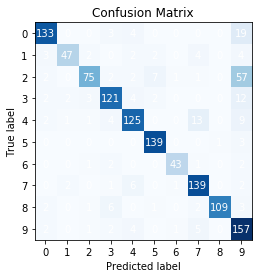

In [68]:
confusion = confusion_matrix_custom(test_labels_class, predicted_class, label_dict) # calling confusion matrix custom function to diplay confusion matrix

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">TP, FP, FN, TN</p>

In [69]:
true_positives, false_positives, false_negatives, true_negatives = TF_FP_FN_TN(confusion) # calling custom function to get TP, FP, FN, TN

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Accuracy</p>

In [70]:
accuracy = accuracy_score(test_labels_class, predicted_class) #Check accuracy of the trained model
print("accuracy", accuracy)


accuracy 0.8305343511450382


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Precision</p>

In [71]:
precision = precision_score(test_labels_class, predicted_class, average='macro') #Check precision of the trained model
print("precision", precision)

precision 0.8690625004111979


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">F1 score</p>

In [72]:
f1_sc =  f1_score(test_labels_class,predicted_class, average='macro') #Check f1_score of the trained model
print("f1_score", f1_sc)

f1_score 0.8378695288817744


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Sensitivity or Recall</p>

In [73]:
average_sensitivity = sensitivity_custom(true_positives, false_negatives) # calling custom function to calculate sensitivity or recall

average_sensitivity or recall: 0.8278207554744507


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Specificity</p>

In [74]:
average_specificity = specificity_custom(true_negatives, false_positives) # calling custom function to calculate specificity


average_specificity: 0.9807246589754165


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Classification Report</p>

In [75]:
print(classification_report(test_labels_class,predicted_class)) # This method gives the overall report of the trained model

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       159
           1       0.90      0.73      0.81        64
           2       0.89      0.51      0.65       147
           3       0.86      0.83      0.84       146
           4       0.85      0.81      0.83       155
           5       0.92      0.97      0.95       143
           6       0.93      0.88      0.91        49
           7       0.84      0.92      0.88       151
           8       0.99      0.88      0.93       124
           9       0.59      0.91      0.71       172

    accuracy                           0.83      1310
   macro avg       0.87      0.83      0.84      1310
weighted avg       0.85      0.83      0.83      1310



In [76]:
result.append(['ANN', accuracy, precision, average_sensitivity, f1_sc, average_sensitivity, average_specificity]);

In [77]:
print(tabulate(result, headers=table_columns, tablefmt="fancy_grid"))

╒═════════╤════════════╤═════════════╤══════════╤════════════╤═══════════════╤═══════════════╕
│ Model   │   Accuracy │   Precision │   Recall │   F1 score │   Sensitivity │   Specificity │
╞═════════╪════════════╪═════════════╪══════════╪════════════╪═══════════════╪═══════════════╡
│ ANN     │   0.830534 │    0.869063 │ 0.827821 │    0.83787 │      0.827821 │      0.980725 │
╘═════════╧════════════╧═════════════╧══════════╧════════════╧═══════════════╧═══════════════╛


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Mis-classification</p>

In [78]:
average_mis_classification = mis_classification_custom(false_negatives, true_positives, true_negatives, false_positives ) # calling custom function to calculate mis-classification of the model

Mis-Classification:  0.03389312977099237


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Loss</p>

In [79]:
overall_loss = loss_custom(test_labels_class, predicted_class) # caaling custom loss function to calculate the overall loss of the model

overall_loss:  0.16946564885495916


In [80]:
mis_classification_loss_result.append(['ANN', average_mis_classification, overall_loss]);

In [81]:
print(tabulate(mis_classification_loss_result, headers=mis_classification_loss_table, tablefmt="fancy_grid"))

╒═════════╤══════════════════════╤══════════╕
│ Model   │   Mis-Classification │     Loss │
╞═════════╪══════════════════════╪══════════╡
│ ANN     │            0.0338931 │ 0.169466 │
╘═════════╧══════════════════════╧══════════╛


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">AUC (Area Under the Curve)</p>

41/41 [==============================] - 0s 1ms/step


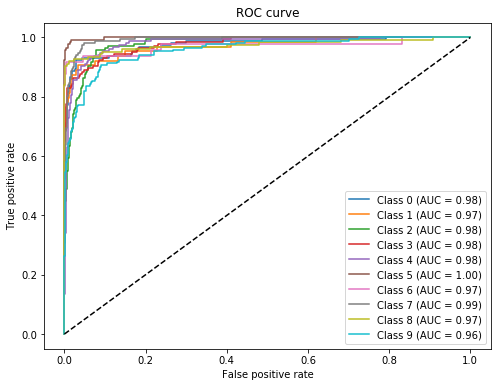

Macro-average AUC: 0.9784558290725794


In [82]:
area_under_the_curve(X_test, y_test) # calling custom function to plot auc

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px;"><u>Load Saved Model</u></p>

In [83]:
# load the model
saved_model = load_model('saved_model/ANN_model.h5')

In [84]:
mfcc  = extract_feature_from_single_file()

(40, 500, 1)


In [85]:
predicted_probabilities = saved_model.predict(mfcc)
predicted_class = np.argmax(predicted_probabilities, axis=1)

# predicted_class = model.predict_classes(prediction_feature) # This function has been deprecated
predicted_class

1/1 [==============================] - 0s 32ms/step


array([1])

In [86]:
predicted_class = int("".join(str(x) for x in predicted_class))
print(predicted_class)

1


In [87]:
# compare integer with dictionary index

if predicted_class in label_dict and label_dict[predicted_class] == label_dict[predicted_class]:
    print(f"The integer {predicted_class} matches the value in the dictionary at index {predicted_class}. {label_dict[predicted_class]}")
else:
    print(f"The integer {predicted_class} does not match the value in the dictionary at index {predicted_class}.")

The integer 1 matches the value in the dictionary at index 1. car_horn


<div style="width:100%;height:3px; background-color:black"></div>

<p id="lstm" style="font-size: 23px; margin-top: 10px; font-weight: bold">LSTM (Long Short-Term Memory Networks)</p> <a href="#top">Back To Top</a>

<div style="width:100%;height:3px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px;"><u>Hyperparameter Tuning</u></p>

<p style="font-size: 20px; margin-top: 10px">The hyperparameters need tuning otherwise it can impact the performance of the model if the best values are not identified. For the hyperparameter tunning there are many techniques like GridSearchCV and RandomSearchCV. GridSearchCV search the hyperparameters by applying all the possible combinations of hyperparameters values whereas RandomSearchCV randomly sample the hyperparameter values for a specified number of iterations. Consequently, I am using RandomSearchCV for the hyperparameters tuning because GridSearchCV can be computationally expensive.</p>

In [161]:
warnings.filterwarnings('ignore') # To ignore the warning

In [155]:
# Define the LSTM model
def LSTM_model(units_1=128, units_2=64, units_3=32, dropout=0.2):
    model = Sequential()
    model.add(LSTM(units=units_1, input_shape=(mfccs.shape[1], mfccs.shape[2]), return_sequences=True))
    model.add(LSTM(units=units_2, return_sequences=True))
    model.add(LSTM(units=units_3))
    model.add(Dense(units=num_labels, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [156]:

# Create a KerasClassifier
keras_model = KerasClassifier(build_fn=LSTM_model, verbose=0)

# Define hyperparameters to search over
param_grid = {
    'units_1': [64, 128, 256],
    'units_2': [32, 64, 128],
    'units_3': [16, 32, 64],
    'dropout': [0.2, 0.3, 0.4],
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 30]
}

# Perform randomized search
random_search = RandomizedSearchCV(keras_model, param_distributions=param_grid, n_iter=10, cv=3, verbose=0)
random_search_results = random_search.fit(X_train, y_train)

# Print results
print('Best score:', random_search_results.best_score_)
print('Best params:', random_search_results.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/50
146/146 [==============================] - 4s 8ms/step - loss: 2.0917 - accuracy: 0.2322
Epoch 2/50
146/146 [==============================] - 1s 7ms/step - loss: 1.8415 - accuracy: 0.3421
Epoch 3/50
146/146 [==============================] - 1s 7ms/step - loss: 1.7212 - accuracy: 0.3827
Epoch 4/50
146/146 [==============================] - 1s 8ms/step - loss: 1.6176 - accuracy: 0.4257
Epoch 5/50
146/146 [==============================] - 1s 8ms/step - loss: 1.5160 - accuracy: 0.4899
Epoch 6/50
146/146 [==============================] - 1s 7ms/step - loss: 1.4649 - accuracy: 0.4970
Epoch 7/50
146/146 [==============================] - 1s 8ms/step - loss: 1.3741 - accuracy: 0.5309
Epoch 8/50
146/146 [==============================] - 1s 8ms/step - loss: 1.2998 - accuracy: 0.5631
Epoch 9/50
146/146 [==============================] - 1s 8ms/step - loss: 1.2386 - accuracy: 0.5812
Epoch 10/50
146/146 [==================

In [ ]:
# {'units_3': 64, 'units_2': 32, 'units_1': 256, 'dropout': 0.2}

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px;"><u>LSTM Model Building Training</u></p>

In [88]:
# Define the LSTM model
model = Sequential()

model.add(LSTM(units=256, input_shape=(mfccs.shape[1], mfccs.shape[2]), return_sequences=True))

model.add(LSTM(units=32, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64))
model.add(Dropout(0.2))

model.add(Dense(units=num_labels, activation='softmax'))

In [89]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 256)           775168    
                                                                 
 lstm_1 (LSTM)               (None, 40, 32)            36992     
                                                                 
 dropout (Dropout)           (None, 40, 32)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                24832     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 837,642
Trainable params: 837,642
Non-tr

In [90]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [91]:
checkpointer = ModelCheckpoint(filepath='saved_model/LSTM_model.h5', verbose=1, save_best_only=True)

In [95]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, callbacks=[checkpointer], validation_data=(X_val, y_val))


Epoch 1/100
194/198 [============================>.] - ETA: 0s - loss: 0.0409 - accuracy: 0.9879
Epoch 1: val_loss did not improve from 0.54200
198/198 [==============================] - 2s 8ms/step - loss: 0.0414 - accuracy: 0.9880 - val_loss: 0.6721 - val_accuracy: 0.8779
Epoch 2/100
196/198 [============================>.] - ETA: 0s - loss: 0.0180 - accuracy: 0.9959
Epoch 2: val_loss did not improve from 0.54200
198/198 [==============================] - 2s 9ms/step - loss: 0.0179 - accuracy: 0.9959 - val_loss: 0.6768 - val_accuracy: 0.8725
Epoch 3/100
195/198 [============================>.] - ETA: 0s - loss: 0.0169 - accuracy: 0.9954
Epoch 3: val_loss did not improve from 0.54200
198/198 [==============================] - 2s 11ms/step - loss: 0.0172 - accuracy: 0.9951 - val_loss: 0.7045 - val_accuracy: 0.8743
Epoch 4/100
194/198 [============================>.] - ETA: 0s - loss: 0.0431 - accuracy: 0.9879
Epoch 4: val_loss did not improve from 0.54200
198/198 [=====================

In [93]:
model.save('saved_model/LSTM_model.h5')

In [94]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

41/41 [==============================] - 0s 4ms/step - loss: 0.7188 - accuracy: 0.8542
Test accuracy: 0.8541984558105469


<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px;"><u>LSTM Model Evaluation</u></p>

In [96]:
y_pred = model.predict(X_test)


41/41 [==============================] - 1s 3ms/step


In [97]:
y_pred_class = np.array(y_pred)
predicted_class = np.argmax(y_pred_class, axis=1)

predicted_class.shape

(1310,)

In [98]:
test_labels_class = np.argmax(y_test, axis=1)
test_labels_class

array([8, 9, 4, ..., 0, 9, 0])

In [99]:
test_labels_class = np.argmax(y_test, axis=1)
test_labels_class

array([8, 9, 4, ..., 0, 9, 0])

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Confusion Matrix</p>

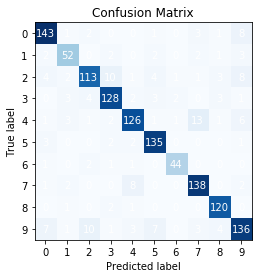

In [100]:
confusion = confusion_matrix_custom(test_labels_class, predicted_class, label_dict)

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">TP, FP, FN, TN</p>

In [101]:
true_positives, false_positives, false_negatives, true_negatives = TF_FP_FN_TN(confusion) # calling custom function to get TP, FP, FN, TN

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Accuracy</p>

In [102]:
accuracy = accuracy_score(test_labels_class, predicted_class) #Check accuracy of the trained model
print("accuracy", accuracy)


accuracy 0.8664122137404581


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Precision</p>

In [103]:
precision = precision_score(test_labels_class, predicted_class, average='macro') #Check precision of the trained model
print("precision", precision)

precision 0.8666659191491493


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">F1 score</p>

In [104]:
f1_sc =  f1_score(test_labels_class,predicted_class, average='macro') #Check f1_score of the trained model
print("f1_score", f1_sc)

f1_score 0.8668573054517321


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Sensitivity or Recall</p>

In [105]:
average_sensitivity = sensitivity_custom(true_positives, false_negatives) # calling custom function to calculate sensitivity or recall

average_sensitivity or recall: 0.8684556129149262


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Specificity</p>

In [106]:
average_specificity = specificity_custom(true_negatives, false_positives) # calling custom function to calculate specificity

average_specificity: 0.9849932973471466


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Classification Report</p>

In [107]:
print(classification_report(test_labels_class,predicted_class)) # This method gives the overall report of the trained model

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       159
           1       0.80      0.81      0.81        64
           2       0.86      0.77      0.81       147
           3       0.86      0.88      0.87       146
           4       0.88      0.81      0.84       155
           5       0.88      0.94      0.91       143
           6       0.92      0.90      0.91        49
           7       0.86      0.91      0.89       151
           8       0.90      0.97      0.93       124
           9       0.82      0.79      0.81       172

    accuracy                           0.87      1310
   macro avg       0.87      0.87      0.87      1310
weighted avg       0.87      0.87      0.87      1310



In [108]:
result.append(['LSTM', accuracy, precision, average_sensitivity, f1_sc, average_sensitivity, average_specificity]);

In [109]:
print(tabulate(result, headers=table_columns, tablefmt="fancy_grid"))

╒═════════╤════════════╤═════════════╤══════════╤════════════╤═══════════════╤═══════════════╕
│ Model   │   Accuracy │   Precision │   Recall │   F1 score │   Sensitivity │   Specificity │
╞═════════╪════════════╪═════════════╪══════════╪════════════╪═══════════════╪═══════════════╡
│ ANN     │   0.830534 │    0.869063 │ 0.827821 │   0.83787  │      0.827821 │      0.980725 │
├─────────┼────────────┼─────────────┼──────────┼────────────┼───────────────┼───────────────┤
│ LSTM    │   0.866412 │    0.866666 │ 0.868456 │   0.866857 │      0.868456 │      0.984993 │
╘═════════╧════════════╧═════════════╧══════════╧════════════╧═══════════════╧═══════════════╛


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Mis-classification</p>

In [110]:
average_mis_classification = mis_classification_custom(false_negatives, true_positives, true_negatives, false_positives ) # calling custom function to calculate mis-classification of the model

Mis-Classification:  0.026717557251908396


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Loss</p>

In [111]:
overall_loss = loss_custom(test_labels_class, predicted_class) # caaling custom loss function to calculate the overall loss of the model

overall_loss:  0.13358778625954013


In [112]:
mis_classification_loss_result.append(['LSTM', average_mis_classification, overall_loss]);

In [113]:
print(tabulate(mis_classification_loss_result, headers=mis_classification_loss_table, tablefmt="fancy_grid"))

╒═════════╤══════════════════════╤══════════╕
│ Model   │   Mis-Classification │     Loss │
╞═════════╪══════════════════════╪══════════╡
│ ANN     │            0.0338931 │ 0.169466 │
├─────────┼──────────────────────┼──────────┤
│ LSTM    │            0.0267176 │ 0.133588 │
╘═════════╧══════════════════════╧══════════╛


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">AUC (Area Under the Curve)</p>

41/41 [==============================] - 0s 3ms/step


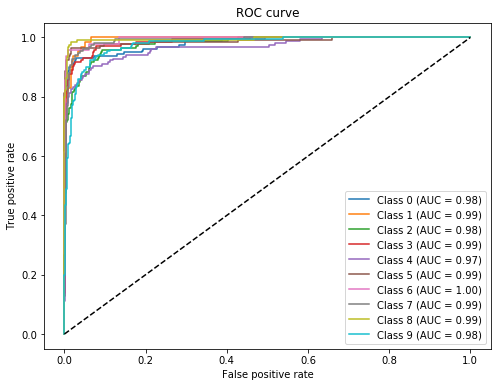

Macro-average AUC: 0.9853722008626488


In [114]:
area_under_the_curve(X_test, y_test) # calling custom function to plot auc

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px;"><u>Load Saved Model</u></p>

In [115]:
saved_model = load_model('saved_model/LSTM_model.h5')

In [116]:
mfcc  = extract_feature_from_single_file()

(40, 500, 1)


In [117]:
predicted_probabilities = saved_model.predict(mfcc)
predicted_class = np.argmax(predicted_probabilities, axis=1)

# predicted_class = model.predict_classes(prediction_feature) # This function has been deprecated
predicted_class

1/1 [==============================] - 1s 550ms/step


array([9])

In [118]:
predicted_class = int("".join(str(x) for x in predicted_class))
print(predicted_class)

9


In [119]:
labels = audio_meta_data[['classID', 'class']].value_counts().keys().sort_values()
label_dict = dict(labels)
label_dict

{0: 'air_conditioner',
 1: 'car_horn',
 2: 'children_playing',
 3: 'dog_bark',
 4: 'drilling',
 5: 'engine_idling',
 6: 'gun_shot',
 7: 'jackhammer',
 8: 'siren',
 9: 'street_music'}

In [120]:
# compare integer with dictionary index

if predicted_class in label_dict and label_dict[predicted_class] == label_dict[predicted_class]:
    print(f"The integer {predicted_class} matches the value in the dictionary at index {predicted_class}. {label_dict[predicted_class]}")
else:
    print(f"The integer {predicted_class} does not match the value in the dictionary at index {predicted_class}.")

The integer 9 matches the value in the dictionary at index 9. street_music


<div style="width:100%;height:3px; background-color:black"></div>

<p id="1dcnn" style="font-size: 23px; margin-top: 10px; font-weight: bold">1DCNN (1D Convolutional Neural Network)</p> <a href="#top">Back To Top</a>

<div style="width:100%;height:3px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px;"><u>Hyperparameter Tuning</u></p>

<p style="font-size: 20px; margin-top: 10px">The hyperparameters need tuning otherwise it can impact the performance of the model if the best values are not identified. For the hyperparameter tunning there are many techniques like GridSearchCV and RandomSearchCV. GridSearchCV search the hyperparameters by applying all the possible combinations of hyperparameters values whereas RandomSearchCV randomly sample the hyperparameter values for a specified number of iterations. Consequently, I am using RandomSearchCV for the hyperparameters tuning because GridSearchCV can be computationally expensive.</p>

In [121]:
warnings.filterwarnings('ignore') # To ignore the warning

In [47]:
# Define the model as a function
def _1DCNN_model(filters=64, kernel_size=3, pool_size=2):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(mfccs.shape[1], mfccs.shape[2])))
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Dropout(0.2))

    model.add(Conv1D(filters=2*filters, kernel_size=kernel_size, activation='relu'))
    model.add(Conv1D(filters=2*filters, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(2*filters, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_labels, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create the KerasClassifier
model = KerasClassifier(build_fn=_1DCNN_model, verbose=0)

# Define the hyperparameter grid
param_grid = {'filters': [32, 64, 128],
              'kernel_size': [3, 5, 7],
              'pool_size': [2, 3],
              'dropout_rate': [0.2, 0.25, 0.3],
              'batch_size': [32, 64, 128],
              'epochs': [10, 20, 30]
             }

# Perform the randomized search with 3-fold cross-validation
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=3)

# Fit the randomized search object to our training data
random_search.fit(X_train, y_train)

2023-04-15 02:47:35.417285: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-15 02:47:35.434023: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-15 02:47:35.434519: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-15 02:47:35.435535: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fbc976e5b90>,
                   param_distributions={'dropout_rate': [0.2, 0.25, 0.3],
                                        'filters': [32, 64, 128],
                                        'kernel_size': [3, 5, 7],
                                        'pool_size': [2, 3]})

In [48]:
# Print the best parameters and the corresponding score
print('Best parameters:', random_search.best_params_)
print('Best score:', random_search.best_score_)

Best parameters: {'pool_size': 2, 'kernel_size': 5, 'filters': 128, 'dropout_rate': 0.25}
Best score: 0.5679337779680887


<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px;"><u>1DCNN Model Building Training</u></p>

In [122]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(mfccs.shape[1], mfccs.shape[2])))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_labels, activation='softmax'))



In [123]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [124]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 38, 64)            96064     
                                                                 
 conv1d_1 (Conv1D)           (None, 36, 64)            12352     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 18, 64)           0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 18, 64)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 16, 128)           24704     
                                                                 
 conv1d_3 (Conv1D)           (None, 14, 128)           49280     
                                                      

In [125]:
checkpointer = ModelCheckpoint(filepath='saved_model/_1DCNN_model.h5', verbose=1, save_best_only=True)

In [126]:
history = model.fit(X_train, y_train, batch_size=128, epochs=30, callbacks=[checkpointer], validation_data=(X_val, y_val))


Epoch 1/30
50/50 [==============================] - ETA: 0s - loss: 2.0231 - accuracy: 0.2471
Epoch 1: val_loss improved from inf to 1.68076, saving model to saved_model/_1DCNN_model.h5
50/50 [==============================] - 3s 13ms/step - loss: 2.0231 - accuracy: 0.2471 - val_loss: 1.6808 - val_accuracy: 0.4300
Epoch 2/30
48/50 [===========================>..] - ETA: 0s - loss: 1.5812 - accuracy: 0.4425
Epoch 2: val_loss improved from 1.68076 to 1.23567, saving model to saved_model/_1DCNN_model.h5
50/50 [==============================] - 0s 7ms/step - loss: 1.5777 - accuracy: 0.4439 - val_loss: 1.2357 - val_accuracy: 0.5961
Epoch 3/30
49/50 [============================>.] - ETA: 0s - loss: 1.2548 - accuracy: 0.5595
Epoch 3: val_loss improved from 1.23567 to 1.01019, saving model to saved_model/_1DCNN_model.h5
50/50 [==============================] - 0s 7ms/step - loss: 1.2538 - accuracy: 0.5596 - val_loss: 1.0102 - val_accuracy: 0.6562
Epoch 4/30
49/50 [============================

In [127]:
model.save('saved_model/_1DCNN_model.h5')

In [128]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9167938828468323


<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px;"><u>1DCNN Model Evaluation</u></p>

In [129]:
y_pred = model.predict(X_test)


41/41 [==============================] - 0s 2ms/step


In [130]:
y_pred_class = np.array(y_pred)
predicted_class = np.argmax(y_pred_class, axis=1)

predicted_class.shape

(1310,)

In [131]:
test_labels_class = np.argmax(y_test, axis=1)
test_labels_class

array([8, 9, 4, ..., 0, 9, 0])

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Confusion Matrix</p>

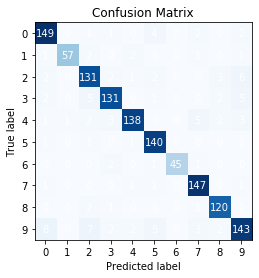

In [132]:
confusion = confusion_matrix_custom(test_labels_class, predicted_class, label_dict) # calling confusion matrix custom function to diplay confusion matrix

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">TP, FP, FN, TN</p>

In [133]:
true_positives, false_positives, false_negatives, true_negatives = TF_FP_FN_TN(confusion) # calling custom function to get TP, FP, FN, TN

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Accuracy</p>

In [134]:
accuracy = accuracy_score(test_labels_class, predicted_class) #Check accuracy of the trained model
print("accuracy", accuracy)


accuracy 0.916793893129771


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Precision</p>

In [135]:
precision = precision_score(test_labels_class, predicted_class, average='macro') #Check precision of the trained model
print("precision", precision)

precision 0.9273870166787189


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">F1 score</p>

In [136]:
f1_sc =  f1_score(test_labels_class,predicted_class, average='macro') #Check f1_score of the trained model
print("f1_score", f1_sc)

f1_score 0.9216117000522388


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Sensitivity or Recall</p>

In [137]:
average_sensitivity = sensitivity_custom(true_positives, false_negatives) # calling custom function to calculate sensitivity or recall

average_sensitivity or recall: 0.917650677949746


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Specificity</p>

In [138]:
average_specificity = specificity_custom(true_negatives, false_positives) # calling custom function to calculate specificity


average_specificity: 0.9905969899156609


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Classification Report</p>

In [139]:
print(classification_report(test_labels_class,predicted_class)) # This method gives the overall report of the trained model

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       159
           1       0.98      0.89      0.93        64
           2       0.87      0.89      0.88       147
           3       0.92      0.90      0.91       146
           4       0.95      0.89      0.92       155
           5       0.91      0.98      0.94       143
           6       1.00      0.92      0.96        49
           7       0.92      0.97      0.95       151
           8       0.93      0.97      0.95       124
           9       0.89      0.83      0.86       172

    accuracy                           0.92      1310
   macro avg       0.93      0.92      0.92      1310
weighted avg       0.92      0.92      0.92      1310



In [140]:
result.append(['1DCNN', accuracy, precision, average_sensitivity, f1_sc, average_sensitivity, average_specificity]);

In [141]:
print(tabulate(result, headers=table_columns, tablefmt="fancy_grid"))

╒═════════╤════════════╤═════════════╤══════════╤════════════╤═══════════════╤═══════════════╕
│ Model   │   Accuracy │   Precision │   Recall │   F1 score │   Sensitivity │   Specificity │
╞═════════╪════════════╪═════════════╪══════════╪════════════╪═══════════════╪═══════════════╡
│ ANN     │   0.830534 │    0.869063 │ 0.827821 │   0.83787  │      0.827821 │      0.980725 │
├─────────┼────────────┼─────────────┼──────────┼────────────┼───────────────┼───────────────┤
│ LSTM    │   0.866412 │    0.866666 │ 0.868456 │   0.866857 │      0.868456 │      0.984993 │
├─────────┼────────────┼─────────────┼──────────┼────────────┼───────────────┼───────────────┤
│ 1DCNN   │   0.916794 │    0.927387 │ 0.917651 │   0.921612 │      0.917651 │      0.990597 │
╘═════════╧════════════╧═════════════╧══════════╧════════════╧═══════════════╧═══════════════╛


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Mis-classification</p>

In [142]:
average_mis_classification = mis_classification_custom(false_negatives, true_positives, true_negatives, false_positives ) # calling custom function to calculate mis-classification of the model

Mis-Classification:  0.0166412213740458


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Loss</p>

In [143]:
overall_loss = loss_custom(test_labels_class, predicted_class) # caaling custom loss function to calculate the overall loss of the model

overall_loss:  0.08320610687023172


In [144]:
mis_classification_loss_result.append(['1DCNN', average_mis_classification, overall_loss]);

In [145]:
print(tabulate(mis_classification_loss_result, headers=mis_classification_loss_table, tablefmt="fancy_grid"))

╒═════════╤══════════════════════╤═══════════╕
│ Model   │   Mis-Classification │      Loss │
╞═════════╪══════════════════════╪═══════════╡
│ ANN     │            0.0338931 │ 0.169466  │
├─────────┼──────────────────────┼───────────┤
│ LSTM    │            0.0267176 │ 0.133588  │
├─────────┼──────────────────────┼───────────┤
│ 1DCNN   │            0.0166412 │ 0.0832061 │
╘═════════╧══════════════════════╧═══════════╛


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">AUC (Area Under the Curve)</p>

41/41 [==============================] - 0s 2ms/step


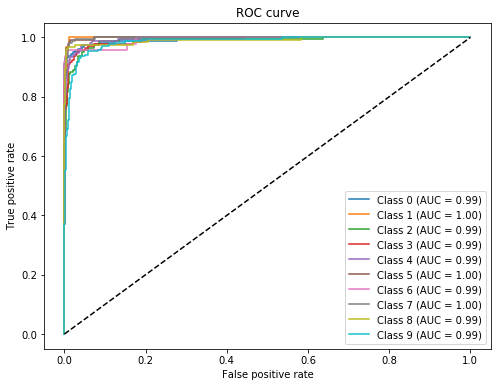

Macro-average AUC: 0.9934920839781176


In [146]:
area_under_the_curve(X_test, y_test) # calling custom function to plot auc

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px;"><u>Load Saved Model</u></p>

In [147]:
saved_model = load_model('saved_model/_1DCNN_model.h5')

In [148]:
mfcc  = extract_feature_from_single_file()

(40, 500, 1)


In [149]:
predicted_probabilities = saved_model.predict(mfcc)
predicted_class = np.argmax(predicted_probabilities, axis=1)

# predicted_class = model.predict_classes(prediction_feature) # This function has been deprecated
predicted_class

1/1 [==============================] - 0s 104ms/step


array([1])

In [150]:
predicted_class = int("".join(str(x) for x in predicted_class))
print(predicted_class)

1


In [151]:
labels = audio_meta_data[['classID', 'class']].value_counts().keys().sort_values()
label_dict = dict(labels)
label_dict

{0: 'air_conditioner',
 1: 'car_horn',
 2: 'children_playing',
 3: 'dog_bark',
 4: 'drilling',
 5: 'engine_idling',
 6: 'gun_shot',
 7: 'jackhammer',
 8: 'siren',
 9: 'street_music'}

In [152]:
# compare integer with dictionary index

if predicted_class in label_dict and label_dict[predicted_class] == label_dict[predicted_class]:
    print(f"The integer {predicted_class} matches the value in the dictionary at index {predicted_class}. {label_dict[predicted_class]}")
else:
    print(f"The integer {predicted_class} does not match the value in the dictionary at index {predicted_class}.")

The integer 1 matches the value in the dictionary at index 1. car_horn


<div style="width:100%;height:3px; background-color:black"></div>

<p id="cnn" style="font-size: 23px; margin-top: 10px; font-weight: bold">CNN (Convolutional Neural Network)</p> <a href="#top">Back To Top</a>

<div style="width:100%;height:3px; background-color:black"></div>

In [153]:
# Reshape MFCC sequences for input into CNN
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_train_reshaped.shape

(6308, 40, 500, 1)

In [154]:
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_test_reshaped.shape

(1310, 40, 500, 1)

In [155]:
X_val_reshaped = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)
X_val_reshaped.shape

(1114, 40, 500, 1)

<p style="font-size: 23px; margin-top: 10px;"><u>Hyperparameter Tuning</u></p>

<p style="font-size: 20px; margin-top: 10px">The hyperparameters need tuning otherwise it can impact the performance of the model if the best values are not identified. For the hyperparameter tunning there are many techniques like GridSearchCV and RandomSearchCV. GridSearchCV search the hyperparameters by applying all the possible combinations of hyperparameters values whereas RandomSearchCV randomly sample the hyperparameter values for a specified number of iterations. Consequently, I am using RandomSearchCV for the hyperparameters tuning because GridSearchCV can be computationally expensive.</p>

In [156]:
warnings.filterwarnings('ignore') # To ignore the warning

In [78]:
# Define the hyperparameter space
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30],
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'filters': [32, 64, 128],
    'kernel_size': [3, 5, 7],
    'pool_size': [2, 3],
    'dropout_rate': [0.2, 0.25, 0.3]
}

# Define a function to create the Keras model
def CNN_model(optimizer='adam', input_shape = (mfccs.shape[1], mfccs.shape[2], 1)):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_labels, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create a KerasClassifier wrapper for the model
model_wrapper = KerasClassifier(build_fn=CNN_model, verbose=0)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model_wrapper, param_distributions=param_grid, n_iter=10, cv=3)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print(random_search.best_params_)

2023-04-15 04:45:32.524439: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_63/dropout_84/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-04-15 04:46:22.607395: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_64/dropout_86/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-04-15 04:47:12.641765: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_65/dropout_88/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-04-15 04:48:02.683213: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin 

{'optimizer': 'adam', 'epochs': 30, 'batch_size': 16}


In [ ]:
# {'optimizer': 'adam', 'epochs': 30, 'batch_size': 16}

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px;"><u>CNN Model Building Training</u></p>

In [157]:
# Define the input shape
input_shape = (mfccs.shape[1], mfccs.shape[2], 1)

# Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_labels, activation='softmax'))

In [158]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [159]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 498, 32)       320       
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 496, 64)       18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 18, 248, 64)      0         
 )                                                               
                                                                 
 dropout_5 (Dropout)         (None, 18, 248, 64)       0         
                                                                 
 flatten_2 (Flatten)         (None, 285696)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               36569216  
                                                      

In [160]:
checkpointer = ModelCheckpoint(filepath='saved_model/CNN_model.h5', verbose=1, save_best_only=True)

In [161]:
history = model.fit(X_train_reshaped, y_train, batch_size=16, epochs=30, callbacks=[checkpointer], validation_data=(X_val_reshaped, y_val))


Epoch 1/30


2023-04-18 14:14:36.242358: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_5/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


395/395 [==============================] - ETA: 0s - loss: 1.6596 - accuracy: 0.3974
Epoch 1: val_loss improved from inf to 1.11990, saving model to saved_model/CNN_model.h5
395/395 [==============================] - 5s 11ms/step - loss: 1.6596 - accuracy: 0.3974 - val_loss: 1.1199 - val_accuracy: 0.6293
Epoch 2/30
394/395 [============================>.] - ETA: 0s - loss: 1.2143 - accuracy: 0.5839
Epoch 2: val_loss improved from 1.11990 to 0.92408, saving model to saved_model/CNN_model.h5
395/395 [==============================] - 4s 10ms/step - loss: 1.2142 - accuracy: 0.5840 - val_loss: 0.9241 - val_accuracy: 0.6975
Epoch 3/30
393/395 [============================>.] - ETA: 0s - loss: 1.0060 - accuracy: 0.6539
Epoch 3: val_loss improved from 0.92408 to 0.79168, saving model to saved_model/CNN_model.h5
395/395 [==============================] - 4s 10ms/step - loss: 1.0054 - accuracy: 0.6544 - val_loss: 0.7917 - val_accuracy: 0.7298
Epoch 4/30
392/395 [============================>.] 

In [162]:
model.save('saved_model/CNN_model.h5')

In [163]:
test_accuracy=model.evaluate(X_test_reshaped,y_test,verbose=0)
print(test_accuracy[1])

0.8770992159843445


<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px;"><u>CNN Model Evaluation</u></p>

In [164]:
y_pred = model.predict(X_test_reshaped)


41/41 [==============================] - 0s 3ms/step


In [165]:
y_pred_class = np.array(y_pred)
predicted_class = np.argmax(y_pred_class, axis=1)

predicted_class.shape

(1310,)

In [166]:
test_labels_class = np.argmax(y_test, axis=1)
test_labels_class

array([8, 9, 4, ..., 0, 9, 0])

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Confusion Matrix</p>

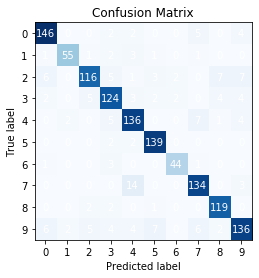

In [167]:
confusion = confusion_matrix_custom(test_labels_class, predicted_class, label_dict) # calling confusion matrix custom function to diplay confusion matrix

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">TP, FP, FN, TN</p>

In [168]:
true_positives, false_positives, false_negatives, true_negatives = TF_FP_FN_TN(confusion) # calling custom function to get TP, FP, FN, TN

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Accuracy</p>

In [169]:
accuracy = accuracy_score(test_labels_class, predicted_class) #Check accuracy of the trained model
print("accuracy", accuracy)


accuracy 0.8770992366412214


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Precision</p>

In [170]:
precision = precision_score(test_labels_class, predicted_class, average='macro') #Check precision of the trained model
print("precision", precision)

precision 0.8839909557875218


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">F1 score</p>

In [171]:
f1_sc =  f1_score(test_labels_class,predicted_class, average='macro') #Check f1_score of the trained model
print("f1_score", f1_sc)

f1_score 0.8810630611985972


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Sensitivity or Recall</p>

In [172]:
average_sensitivity = sensitivity_custom(true_positives, false_negatives) # calling custom function to calculate sensitivity or recall

average_sensitivity or recall: 0.8801243531318985


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Specificity</p>

In [173]:
average_specificity = specificity_custom(true_negatives, false_positives) # calling custom function to calculate specificity


average_specificity: 0.9861563435515859


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Classification Report</p>

In [174]:
print(classification_report(test_labels_class,predicted_class)) # This method gives the overall report of the trained model

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       159
           1       0.93      0.86      0.89        64
           2       0.90      0.79      0.84       147
           3       0.83      0.85      0.84       146
           4       0.82      0.88      0.85       155
           5       0.91      0.97      0.94       143
           6       0.92      0.90      0.91        49
           7       0.87      0.89      0.88       151
           8       0.89      0.96      0.93       124
           9       0.86      0.79      0.82       172

    accuracy                           0.88      1310
   macro avg       0.88      0.88      0.88      1310
weighted avg       0.88      0.88      0.88      1310



In [175]:
result.append(['CNN', accuracy, precision, average_sensitivity, f1_sc, average_sensitivity, average_specificity]);

In [176]:
print(tabulate(result, headers=table_columns, tablefmt="fancy_grid"))

╒═════════╤════════════╤═════════════╤══════════╤════════════╤═══════════════╤═══════════════╕
│ Model   │   Accuracy │   Precision │   Recall │   F1 score │   Sensitivity │   Specificity │
╞═════════╪════════════╪═════════════╪══════════╪════════════╪═══════════════╪═══════════════╡
│ ANN     │   0.830534 │    0.869063 │ 0.827821 │   0.83787  │      0.827821 │      0.980725 │
├─────────┼────────────┼─────────────┼──────────┼────────────┼───────────────┼───────────────┤
│ LSTM    │   0.866412 │    0.866666 │ 0.868456 │   0.866857 │      0.868456 │      0.984993 │
├─────────┼────────────┼─────────────┼──────────┼────────────┼───────────────┼───────────────┤
│ 1DCNN   │   0.916794 │    0.927387 │ 0.917651 │   0.921612 │      0.917651 │      0.990597 │
├─────────┼────────────┼─────────────┼──────────┼────────────┼───────────────┼───────────────┤
│ CNN     │   0.877099 │    0.883991 │ 0.880124 │   0.881063 │      0.880124 │      0.986156 │
╘═════════╧════════════╧═════════════╧══════════╧═

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Mis-classification</p>

In [177]:
average_mis_classification = mis_classification_custom(false_negatives, true_positives, true_negatives, false_positives ) # calling custom function to calculate mis-classification of the model

Mis-Classification:  0.02458015267175573


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Loss</p>

In [178]:
overall_loss = loss_custom(test_labels_class, predicted_class) # caaling custom loss function to calculate the overall loss of the model

overall_loss:  0.12290076335878271


In [179]:
mis_classification_loss_result.append(['CNN', average_mis_classification, overall_loss]);


In [180]:
print(tabulate(mis_classification_loss_result, headers=mis_classification_loss_table, tablefmt="fancy_grid"))

╒═════════╤══════════════════════╤═══════════╕
│ Model   │   Mis-Classification │      Loss │
╞═════════╪══════════════════════╪═══════════╡
│ ANN     │            0.0338931 │ 0.169466  │
├─────────┼──────────────────────┼───────────┤
│ LSTM    │            0.0267176 │ 0.133588  │
├─────────┼──────────────────────┼───────────┤
│ 1DCNN   │            0.0166412 │ 0.0832061 │
├─────────┼──────────────────────┼───────────┤
│ CNN     │            0.0245802 │ 0.122901  │
╘═════════╧══════════════════════╧═══════════╛


41/41 [==============================] - 0s 3ms/step


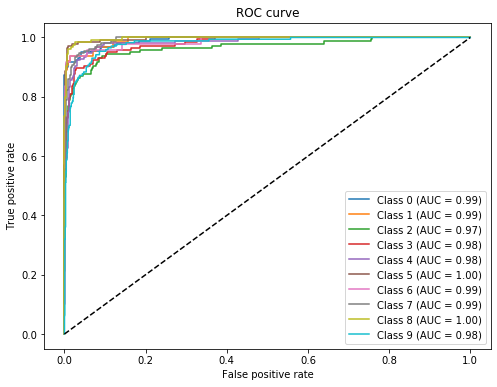

Macro-average AUC: 0.9868231391208111


In [181]:
area_under_the_curve(X_test_reshaped, y_test) # calling custom function to plot auc

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px;"><u>Load Saved Model</u></p>

In [182]:
saved_model = load_model('saved_model/CNN_model.h5')

In [183]:
mfcc  = extract_feature_from_single_file()

(40, 500, 1)


In [184]:
predicted_probabilities = saved_model.predict(mfcc)
predicted_class = np.argmax(predicted_probabilities, axis=1)

# predicted_class = model.predict_classes(prediction_feature) # This function has been deprecated
predicted_class

1/1 [==============================] - 0s 65ms/step


array([1])

In [185]:
predicted_class = int("".join(str(x) for x in predicted_class))
print(predicted_class)

1


In [186]:
labels = audio_meta_data[['classID', 'class']].value_counts().keys().sort_values()
label_dict = dict(labels)
label_dict

{0: 'air_conditioner',
 1: 'car_horn',
 2: 'children_playing',
 3: 'dog_bark',
 4: 'drilling',
 5: 'engine_idling',
 6: 'gun_shot',
 7: 'jackhammer',
 8: 'siren',
 9: 'street_music'}

In [187]:
# compare integer with dictionary index

if predicted_class in label_dict and label_dict[predicted_class] == label_dict[predicted_class]:
    print(f"The integer {predicted_class} matches the value in the dictionary at index {predicted_class}. {label_dict[predicted_class]}")
else:
    print(f"The integer {predicted_class} does not match the value in the dictionary at index {predicted_class}.")

The integer 1 matches the value in the dictionary at index 1. car_horn


<div style="width:100%;height:3px; background-color:black"></div>

<p id="res" style="font-size:30px; text-align:center"><u>Results Comparison and Discussion</u></p><a href="#top1">Back To Top</a>

<div style="width:100%;height:3px; background-color:black"></div>

<p style="font-size:25px;"><u>Comparison</u></p>

In [188]:
print(tabulate(result, headers=table_columns, tablefmt="fancy_grid"))

╒═════════╤════════════╤═════════════╤══════════╤════════════╤═══════════════╤═══════════════╕
│ Model   │   Accuracy │   Precision │   Recall │   F1 score │   Sensitivity │   Specificity │
╞═════════╪════════════╪═════════════╪══════════╪════════════╪═══════════════╪═══════════════╡
│ ANN     │   0.830534 │    0.869063 │ 0.827821 │   0.83787  │      0.827821 │      0.980725 │
├─────────┼────────────┼─────────────┼──────────┼────────────┼───────────────┼───────────────┤
│ LSTM    │   0.866412 │    0.866666 │ 0.868456 │   0.866857 │      0.868456 │      0.984993 │
├─────────┼────────────┼─────────────┼──────────┼────────────┼───────────────┼───────────────┤
│ 1DCNN   │   0.916794 │    0.927387 │ 0.917651 │   0.921612 │      0.917651 │      0.990597 │
├─────────┼────────────┼─────────────┼──────────┼────────────┼───────────────┼───────────────┤
│ CNN     │   0.877099 │    0.883991 │ 0.880124 │   0.881063 │      0.880124 │      0.986156 │
╘═════════╧════════════╧═════════════╧══════════╧═

In [189]:
print(tabulate(mis_classification_loss_result, headers=mis_classification_loss_table, tablefmt="fancy_grid"))

╒═════════╤══════════════════════╤═══════════╕
│ Model   │   Mis-Classification │      Loss │
╞═════════╪══════════════════════╪═══════════╡
│ ANN     │            0.0338931 │ 0.169466  │
├─────────┼──────────────────────┼───────────┤
│ LSTM    │            0.0267176 │ 0.133588  │
├─────────┼──────────────────────┼───────────┤
│ 1DCNN   │            0.0166412 │ 0.0832061 │
├─────────┼──────────────────────┼───────────┤
│ CNN     │            0.0245802 │ 0.122901  │
╘═════════╧══════════════════════╧═══════════╛


<p style="font-size:20px;"><b>Accuracy Comparison using plot </b></p>

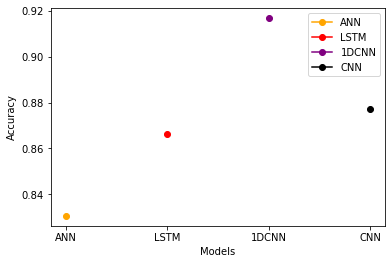

In [190]:
plt.plot(result[0][0],result[0][1],'b-o',label=result[0][0],color='orange')
plt.plot(result[1][0],result[1][1],'b-o',label=result[1][0],color='red')
plt.plot(result[2][0],result[2][1],'b-o',label=result[2][0],color='purple')
plt.plot(result[3][0],result[3][1],'b-o',label=result[3][0],color='black')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<p style="font-size:20px;"><b>Loss Comparison using plot </b></p>

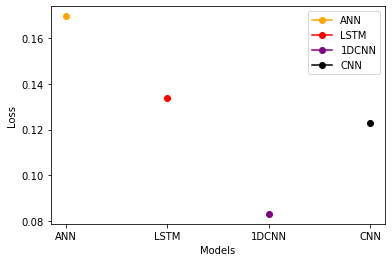

In [191]:
plt.plot(mis_classification_loss_result[0][0],mis_classification_loss_result[0][2],'b-o',label=mis_classification_loss_result[0][0],color='orange')
plt.plot(mis_classification_loss_result[1][0],mis_classification_loss_result[1][2],'b-o',label=mis_classification_loss_result[1][0],color='red')
plt.plot(mis_classification_loss_result[2][0],mis_classification_loss_result[2][2],'b-o',label=mis_classification_loss_result[2][0],color='purple')
plt.plot(mis_classification_loss_result[3][0],mis_classification_loss_result[3][2],'b-o',label=mis_classification_loss_result[3][0],color='black')

plt.xlabel('Models')
plt.ylabel('Loss')
plt.legend()
plt.show()

<p style="font-size: 25px; margin-top: 10px"> From the above evaluation tables, accuracy and loss plots it can be seen that the best performance on the test set comes from "1DCNN" trained with best hyperparameters derived from RandomizedSearchCV. It can be seen that the acuracy of "1DCNN" is 0.916, which is the highest, whereas other networks CNN, LSTM and ANN gave 0.877, 0.866 and 0.830 respectively. The loss value of "1DCNN" is 0.016, which is lowest among other neual networks. Consequently, for this audio dataset "1DCNN" neural network is best among other deep neural networks which have been implemented in this project.</p>